In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [9]:
def make_some_graphs(population1,population2,show_hist=False,bins=None,
                     show_boxplot=True,alpha=None,markersize=None ,show_legend=True,calc_pvalue=True,
                    universe=None,show_p_value=False):
    if len(population1) == 1:
        # We cannot calculate the p-value 
        calc_pvalue = False
        
    if calc_pvalue:
        (statistic,pvalue) = stats.ttest_ind(population1, population2)
    
    if universe is not None:
        title_text = 'Universe #' + str(universe) 
    else:
        title_text = 'Test results'
    
    if calc_pvalue:
        title_text = title_text + ' (p-value = {0:.2f})'.format(pvalue)
        
    
    if show_boxplot:
        x = np.random.normal(1, 0.04, size=len(population1))
        plt.plot(x,population1,'ro',alpha=alpha,markersize=markersize,label='Standard')
        plt.boxplot([population1,population2])
        x = np.random.normal(2, 0.04, size=len(population2))
        plt.plot(x,population2,'bo',alpha=alpha,markersize=markersize,label='Change')
        plt.legend()
        plt.ylabel('Result')
        plt.title(title_text)    
        
        plt.show()
    if show_hist:
        plt.hist([population1,population2],histtype='step',bins=bins,color=['red','blue'])
        plt.title(title_text)
        plt.show()
    
        
    if calc_pvalue:
        if show_p_value:
            print(title_text)
        return pvalue
    else:
        return None

    
def simulate_experiment(u1=15,diff=0.5,sd1=0.5,sd2=0.5,n=2,
                        show_full_distributions=True,num_universes=1,
                       graph_universes=None):
    if show_full_distributions:
        print('If we do enough experiments, here would be the results')
        population1 = np.random.normal(u1, sd1, 1000)
        population2 = np.random.normal(u1+diff, sd2, 1000)
        make_some_graphs(population1,population2,calc_pvalue=False,show_hist=True,bins=100,show_boxplot=True,markersize=2,alpha=0.5)
        print('But we are only taking ', str(n), 'sample(s) of each population')
    
    # Simulate running the experiment num_runs times. 
    reject_H0_count=0
    for i in range(0,num_universes):
        population1 = np.random.normal(u1, sd1, n)
        population2 = np.random.normal(u1+diff, sd2, n)
#         if n == 1:
#             make_some_graphs(population1,population2,calc_pvalue=False,universe=i)
#         else:
        # Work out if we should show the graph or just display the p_value
        show_graph=True
        if graph_universes is not None:
            if i > graph_universes:
                show_graph = False
        
        if show_graph:
            show_boxplot = True
            show_p_value = False
        else:
            show_boxplot = False
            show_p_value = True
            
        p_value = make_some_graphs(population1,population2,calc_pvalue=True,
                                   show_boxplot=show_boxplot,universe=i,show_p_value = show_p_value)
        if p_value is None:
            reject_H0_count = -1
        else:
            if p_value < 0.05:
                reject_H0_count+=1
                
    if n != 1:
        reject_H0_rate = reject_H0_count / num_universes * 100
        fail_reject_H0_rate = 100 - reject_H0_rate
        print('Percentage of universes where H0 is rejected = ', '{0:0.1f}%'.format(reject_H0_rate))
        if diff !=0:
            print('In this case, we know H0 is false, so in {0:0.1f}% of the universes we made a Type II error'.format(fail_reject_H0_rate))
        else:
            print('In this case, we know H0 is true, so in {0:0.1f}% of the universes we made a Type I error'.format(reject_H0_rate))

If we do enough experiments, here would be the results


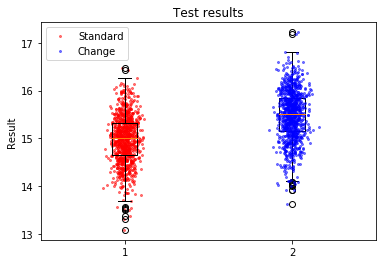

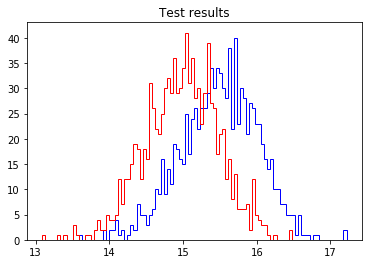

But we are only taking  1 sample(s) of each population


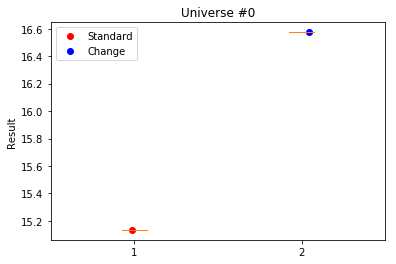

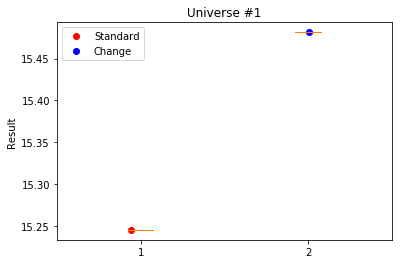

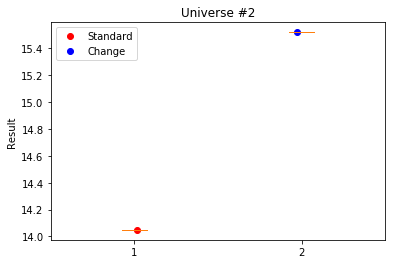

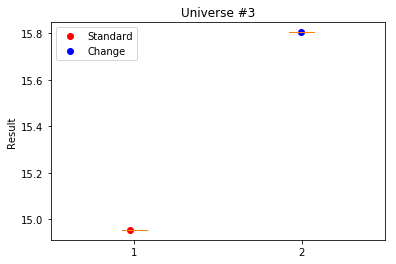

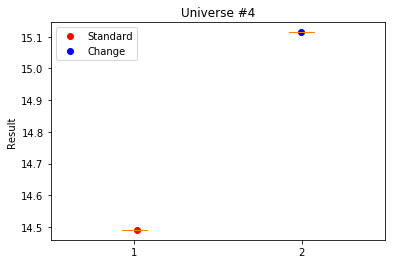

In [10]:
simulate_experiment(u1=15,diff=0.5,sd1=0.5, sd2=0.5, n=1, num_universes=5)


If we do enough experiments, here would be the results


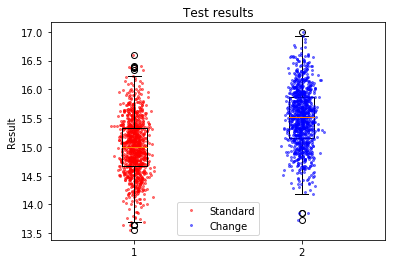

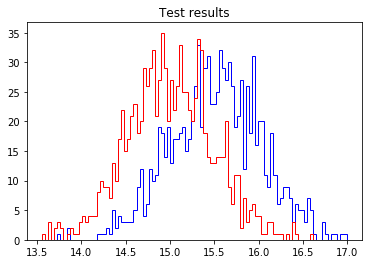

But we are only taking  4 sample(s) of each population


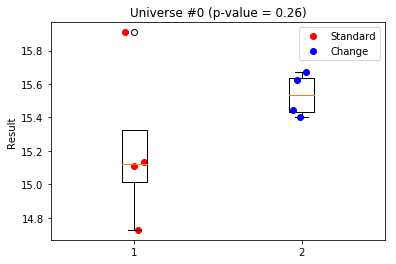

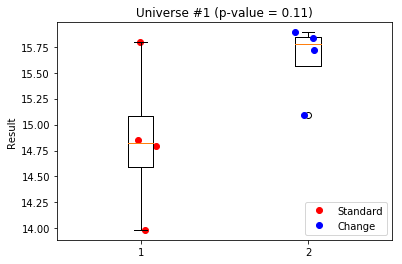

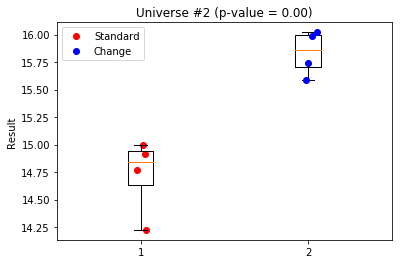

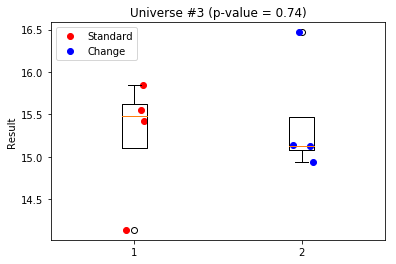

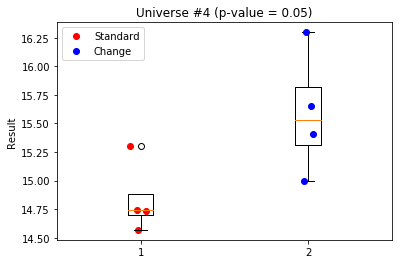

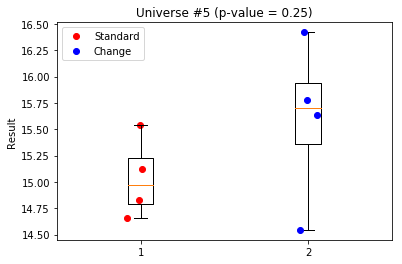

Universe #6 (p-value = 0.91)
Universe #7 (p-value = 0.01)
Universe #8 (p-value = 0.49)
Universe #9 (p-value = 0.09)
Universe #10 (p-value = 0.03)
Universe #11 (p-value = 0.08)
Universe #12 (p-value = 0.74)
Universe #13 (p-value = 0.02)
Universe #14 (p-value = 0.96)
Universe #15 (p-value = 0.10)
Universe #16 (p-value = 0.47)
Universe #17 (p-value = 0.03)
Universe #18 (p-value = 0.56)
Universe #19 (p-value = 0.02)
Percentage of universes where H0 is rejected =  30.0%
In this case, we know H0 is false, so in 70.0% of the universes we made a Type II error


In [12]:
simulate_experiment(u1=15,diff=0.5,sd1=0.5, sd2=0.5, n=4, num_universes=20,graph_universes=5)

If we do enough experiments, here would be the results


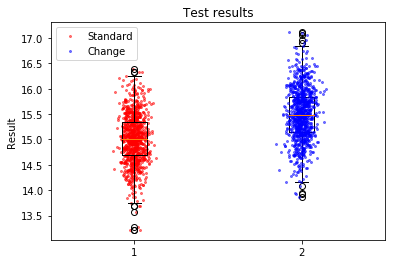

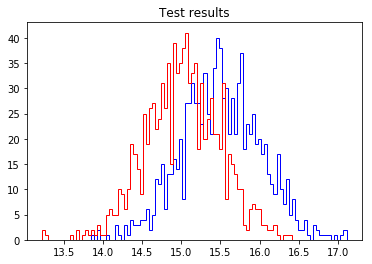

But we are only taking  10 sample(s) of each population


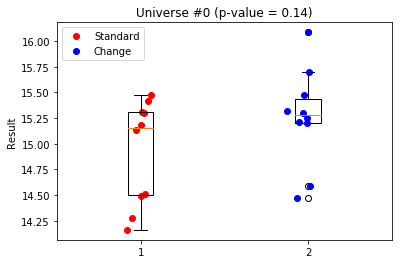

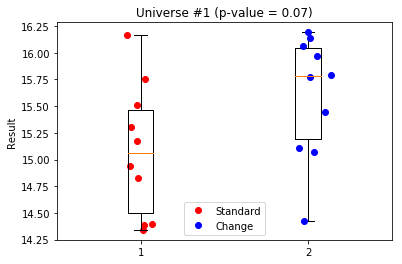

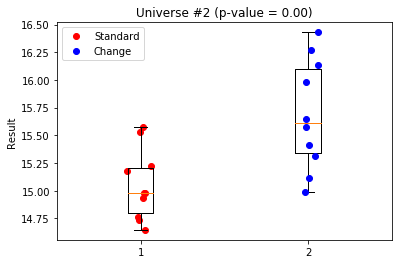

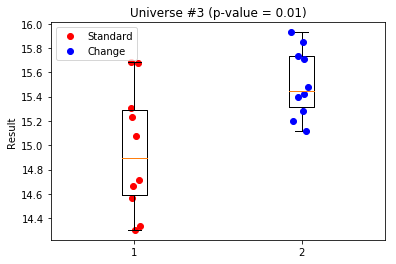

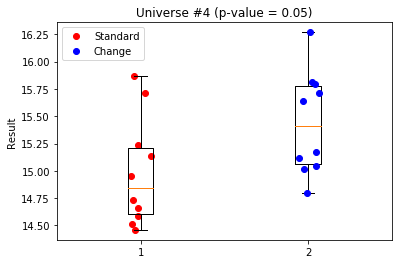

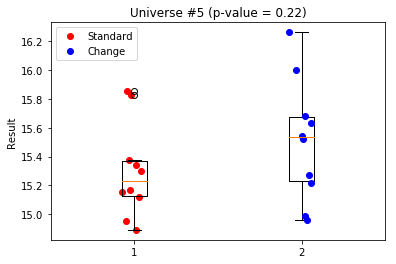

Universe #6 (p-value = 0.02)
Universe #7 (p-value = 0.65)
Universe #8 (p-value = 0.00)
Universe #9 (p-value = 0.36)
Universe #10 (p-value = 0.09)
Universe #11 (p-value = 0.59)
Universe #12 (p-value = 0.00)
Universe #13 (p-value = 0.08)
Universe #14 (p-value = 0.12)
Universe #15 (p-value = 0.03)
Universe #16 (p-value = 0.04)
Universe #17 (p-value = 0.06)
Universe #18 (p-value = 0.00)
Universe #19 (p-value = 0.12)
Percentage of universes where H0 is rejected =  40.0%
In this case, we know H0 is false, so in 60.0% of the universes we made a Type II error


In [13]:
simulate_experiment(u1=15,diff=0.5,sd1=0.5, sd2=0.5, n=10, num_universes=20,graph_universes=5)

If we do enough experiments, here would be the results


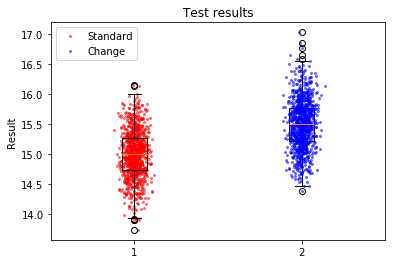

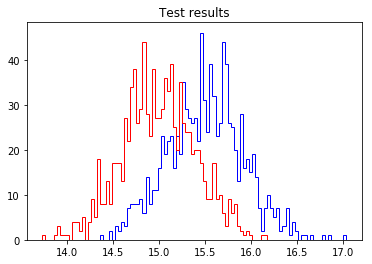

But we are only taking  4 sample(s) of each population


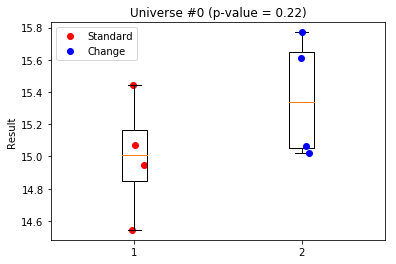

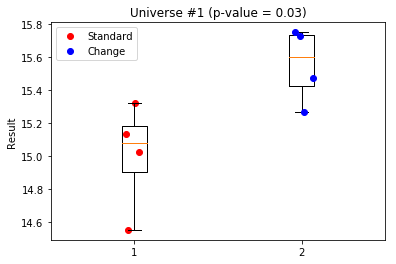

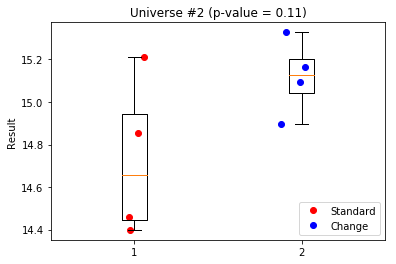

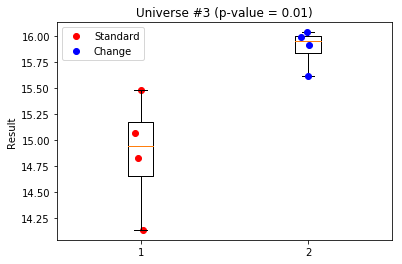

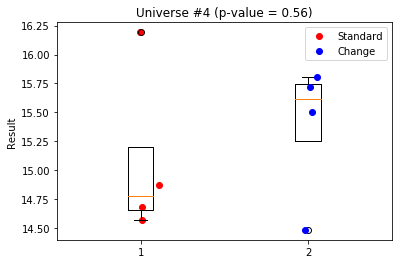

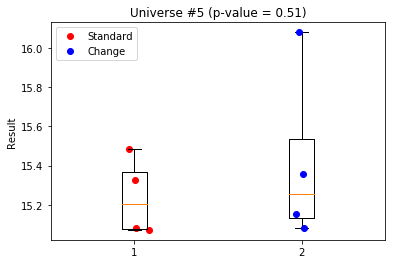

Universe #6 (p-value = 0.21)
Universe #7 (p-value = 0.62)
Universe #8 (p-value = 0.22)
Universe #9 (p-value = 0.13)
Universe #10 (p-value = 0.06)
Universe #11 (p-value = 0.17)
Universe #12 (p-value = 0.04)
Universe #13 (p-value = 0.03)
Universe #14 (p-value = 0.28)
Universe #15 (p-value = 0.04)
Universe #16 (p-value = 0.15)
Universe #17 (p-value = 0.00)
Universe #18 (p-value = 0.00)
Universe #19 (p-value = 0.11)
Percentage of universes where H0 is rejected =  35.0%
In this case, we know H0 is false, so in 65.0% of the universes we made a Type II error


In [14]:
# One way to improve your chances of disproving H0
# Reduce the amount of noise (uncontrolled variation)
simulate_experiment(u1=15,diff=0.5,sd1=0.4, sd2=0.4, n=4, num_universes=20,graph_universes=5)


    

If we do enough experiments, here would be the results


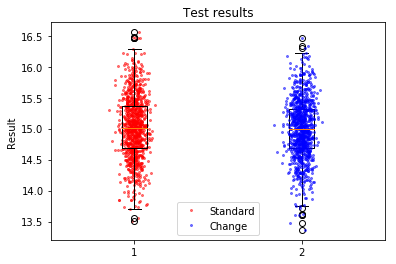

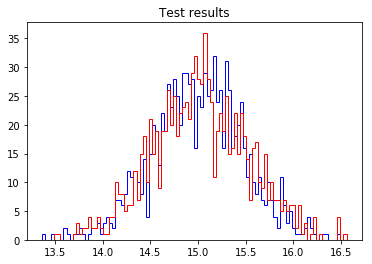

But we are only taking  2 sample(s) of each population


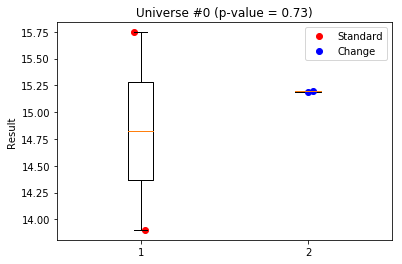

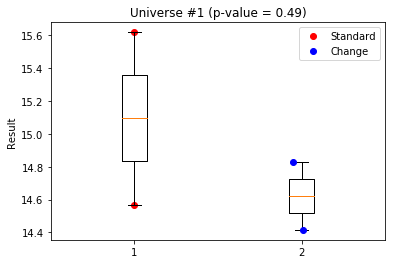

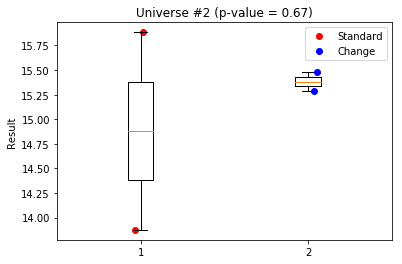

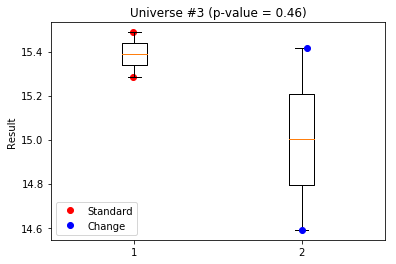

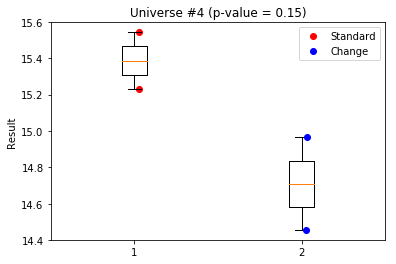

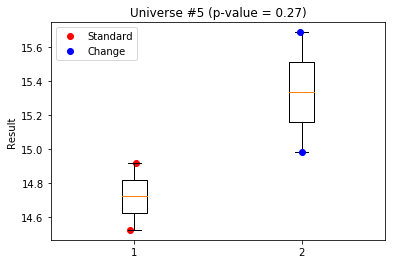

Universe #6 (p-value = 0.29)
Universe #7 (p-value = 0.82)
Universe #8 (p-value = 0.23)
Universe #9 (p-value = 0.38)
Universe #10 (p-value = 0.02)
Universe #11 (p-value = 0.45)
Universe #12 (p-value = 0.30)
Universe #13 (p-value = 0.05)
Universe #14 (p-value = 0.32)
Universe #15 (p-value = 0.15)
Universe #16 (p-value = 0.46)
Universe #17 (p-value = 0.05)
Universe #18 (p-value = 0.32)
Universe #19 (p-value = 0.12)
Universe #20 (p-value = 0.51)
Universe #21 (p-value = 0.85)
Universe #22 (p-value = 0.24)
Universe #23 (p-value = 0.97)
Universe #24 (p-value = 0.06)
Universe #25 (p-value = 0.48)
Universe #26 (p-value = 0.46)
Universe #27 (p-value = 0.38)
Universe #28 (p-value = 0.40)
Universe #29 (p-value = 0.88)
Universe #30 (p-value = 0.29)
Universe #31 (p-value = 0.60)
Universe #32 (p-value = 0.71)
Universe #33 (p-value = 0.13)
Universe #34 (p-value = 0.25)
Universe #35 (p-value = 0.75)
Universe #36 (p-value = 0.69)
Universe #37 (p-value = 1.00)
Universe #38 (p-value = 0.97)
Universe #39 (

In [15]:
# What if the populations are not different? 
simulate_experiment(u1=15,diff=0,sd1=0.5, sd2=0.5, n=2, num_universes=40,graph_universes=5)

If we do enough experiments, here would be the results


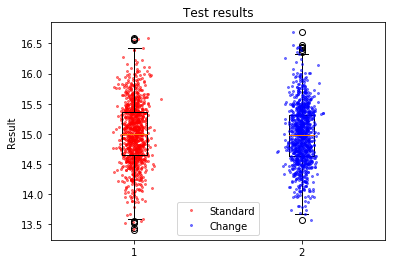

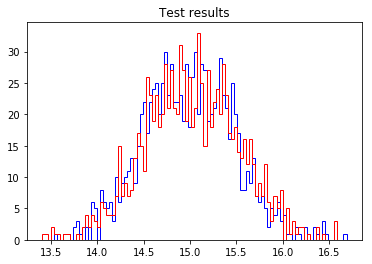

But we are only taking  50 sample(s) of each population


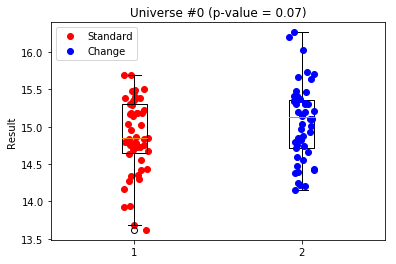

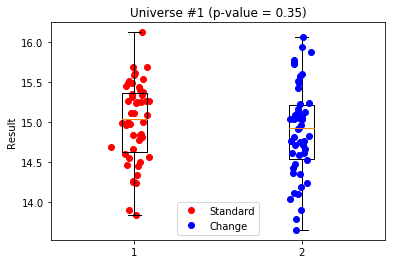

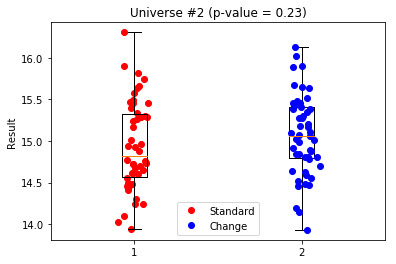

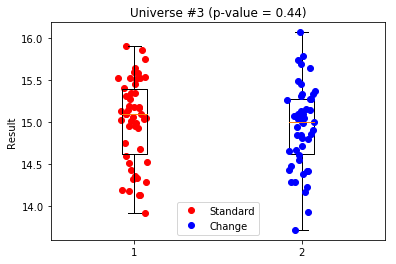

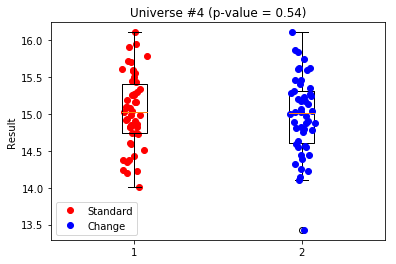

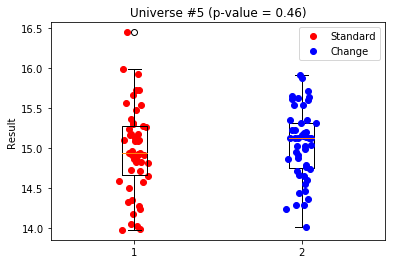

Universe #6 (p-value = 0.94)
Universe #7 (p-value = 0.10)
Universe #8 (p-value = 0.39)
Universe #9 (p-value = 0.81)
Universe #10 (p-value = 0.07)
Universe #11 (p-value = 1.00)
Universe #12 (p-value = 0.14)
Universe #13 (p-value = 0.34)
Universe #14 (p-value = 0.75)
Universe #15 (p-value = 0.82)
Universe #16 (p-value = 0.15)
Universe #17 (p-value = 0.15)
Universe #18 (p-value = 0.41)
Universe #19 (p-value = 0.11)
Universe #20 (p-value = 0.89)
Universe #21 (p-value = 0.14)
Universe #22 (p-value = 0.66)
Universe #23 (p-value = 0.16)
Universe #24 (p-value = 0.65)
Universe #25 (p-value = 0.77)
Universe #26 (p-value = 0.75)
Universe #27 (p-value = 0.83)
Universe #28 (p-value = 0.92)
Universe #29 (p-value = 0.58)
Universe #30 (p-value = 0.44)
Universe #31 (p-value = 0.14)
Universe #32 (p-value = 0.75)
Universe #33 (p-value = 0.26)
Universe #34 (p-value = 0.67)
Universe #35 (p-value = 0.43)
Universe #36 (p-value = 0.64)
Universe #37 (p-value = 0.78)
Universe #38 (p-value = 0.60)
Universe #39 (

In [16]:

simulate_experiment(u1=15,diff=0,sd1=0.5, sd2=0.5, n=50, num_universes=40,graph_universes=5)